# IMPORTACIÓN LIBRERIAS


In [1]:
import numpy as np
import pandas as pd
from math import *
import math
import matplotlib.pyplot as plt
# from PIL import Image
# import seaborn as sns
# import itertools
# import io 
# import plotly.offline as py
#py.init_notebook_mode(connect=True)
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

# CARGA DE ARCHIVOS

In [2]:
def load_dataset(file_path, file_type=None, separator=None, encoding='utf-8', **kwargs):
    """
    Loads a dataset in different formats, with support for custom separators, encoding, and more options.
    """
    # If the file type is not specified, infer from file extension
    if not file_type:
        file_type = file_path.split('.')[-1].lower()

    # Load according to the file type
    if file_type == 'csv':
        return pd.read_csv(file_path, sep=separator or ',', encoding=encoding, **kwargs)
    elif file_type in ['xls', 'xlsx']:
        return pd.read_excel(file_path, **kwargs)
    elif file_type == 'json':
        return pd.read_json(file_path, encoding=encoding, **kwargs)
    else:
        raise ValueError(f"File format '{file_type}' not supported. Use 'csv', 'excel', or 'json'.")

### - ARCHIVO CLIENTES ACTIVOS HASTA 15/9/25

In [3]:
abonado_activo = load_dataset('../data/Llistat Abonats actius 15.09.2025 formato.xlsx')

In [4]:
abonado_activo.columns = abonado_activo.iloc[0]   # primera fila pasa a ser el nombre de columnas
abonado_activo = abonado_activo[2:5865].reset_index(drop=True)  # eliminamos multiindece y la ultima fila ya que corresponde el total
abonado_activo

,IdPersona,Sexo,Edad,FNacimiento,DireccionCompleta,CodigoPostal,FechaAlta,FAntiguedad,FechaBaja,MotivoBaja,TipoAbono,Duracion,GENERAL,Total
0,334,Hombre,82,04/12/1942,"CARRER CERAMICA, 37 BXS",08035,22/03/2011,29/11/1955,,,AVET - ABONATS VETERANS,180,1,1
1,452,Hombre,85,01/08/1940,"CARRER HEDILLA, 410 4-2",08031,18/09/1956,18/09/1956,,,AVET - ABONATS VETERANS,180,1,1
2,642,Hombre,77,02/02/1948,"CARRER SANT TOMAS, 71-73 ENTLO-2",08032,22/03/2011,05/03/1958,,,AVET - ABONATS VETERANS,180,1,1
3,849,Hombre,85,10/04/1940,"Carrer de Marie Curie, 40",08042,04/08/1958,04/08/1958,,,CL04 - JUBILATS SENSE DRET A US,365,1,1
4,891,Hombre,78,23/09/1946,"CARRER ROSSELLO, 31 AT-1",08029,22/03/2011,07/01/1959,,,AVET - ABONATS VETERANS,180,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5858,117580,Mujer,21,26/06/2004,"CARRER DEL TORRENT DE CAN MARINER, 33, 3-3",08031,15/09/2025,15/09/2025,,,JO00 - QUOTA DESCOMPTE JOVE (DE 18 A 25 ANYS),30,1,1
5859,117582,Mujer,24,30/10/2000,"PASSEIG FABRA I PUIG, 391",08031,15/09/2025,15/09/2025,01/12/2025,Canvi Domicili,JO00 - QUOTA DESCOMPTE JOVE (DE 18 A 25 ANYS),30,1,1
5860,117584,Mujer,52,25/07/1973,"VIA JULIA, 124 5º3ª",08016,15/09/2025,15/09/2025,01/10/2025,,AA00 - ADULTS ( 26 A 64 ANYS ),30,1,1
5861,117585,Hombre,20,09/11/2004,"CARRER MOSEN JACIN VERDAGUER, 108",NaN,15/09/2025,15/09/2025,,,JO00 - QUOTA DESCOMPTE JOVE (DE 18 A 25 ANYS),30,1,1


#### GESTIÓN DE TIPADO COLUMNAS

In [5]:
abonadoactivo_eda= abonado_activo.copy()

In [6]:
abonadoactivo_eda= abonadoactivo_eda.drop(columns=['FechaBaja', 'MotivoBaja','Duracion', 'GENERAL', 'Total'])
abonadoactivo_eda= abonadoactivo_eda.rename(columns={'FechaAlta': 'FechaÚltimaAlta', 'TipoAbono': 'TipoAbonoActual'})

In [7]:
abonadoactivo_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5863 entries, 0 to 5862
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   IdPersona          5692 non-null   object
 1   Sexo               5692 non-null   object
 2   Edad               5692 non-null   object
 3   FNacimiento        5692 non-null   object
 4   DireccionCompleta  5692 non-null   object
 5   CodigoPostal       5687 non-null   object
 6   FechaÚltimaAlta    5863 non-null   object
 7   FAntiguedad        5863 non-null   object
 8   TipoAbonoActual    5863 non-null   object
dtypes: object(9)
memory usage: 412.4+ KB


In [8]:
cols_numericas = ["Edad"]

for col in cols_numericas:
    abonadoactivo_eda[col] = pd.to_numeric(abonadoactivo_eda[col], errors="coerce")

In [9]:
cols_fechas = ["FNacimiento", "FechaÚltimaAlta", "FAntiguedad"]

for col in cols_fechas:
    abonadoactivo_eda[col] = pd.to_datetime(abonadoactivo_eda[col], errors="coerce", dayfirst=True)

In [10]:
# Identify numeric and categorical variables
print("\n📋 Variable Types:")

# Numeric variables
num_vbles_df = abonadoactivo_eda.select_dtypes(include='number').columns.tolist()

# Categorical variables
cat_vbles_df = abonadoactivo_eda.select_dtypes(exclude='number').columns.tolist()
print(f"Numeric variables: {num_vbles_df}")
print(f"Categorical variables: {cat_vbles_df}")


📋 Variable Types:
Numeric variables: ['Edad']
Categorical variables: ['IdPersona', 'Sexo', 'FNacimiento', 'DireccionCompleta', 'CodigoPostal', 'FechaÚltimaAlta', 'FAntiguedad', 'TipoAbonoActual']


#### TRATAMIENTOS DE NULOS

-PRE


📌 Variables with missing values:


,Total Missing,Percentage Missing
0,,
CodigoPostal,176,3.001876
IdPersona,171,2.916596
Sexo,171,2.916596
Edad,171,2.916596
FNacimiento,171,2.916596
DireccionCompleta,171,2.916596


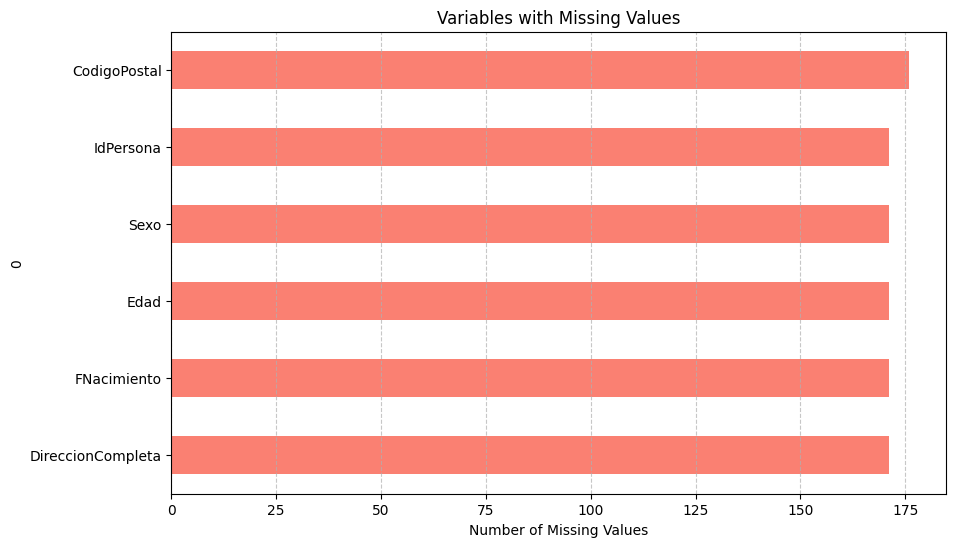

In [12]:
# 4. Variables with missing values
    # Detect columns with missing values and show the percentage
print("\n📌 Variables with missing values:")

# Count missing values by column
missing = abonadoactivo_eda.isnull().sum()

# Filter only columns with missing values
missing = missing[missing > 0].sort_values(ascending=False)

# Calculate missing percentage
missing_percentage = (missing / len(abonadoactivo_eda)) * 100

# Create a DataFrame to show the count and percentage of missing values
missing_df = pd.DataFrame({'Total Missing': missing, 'Percentage Missing': missing_percentage})

# If missing values exist, display a bar chart of missing values distribution
if not missing.empty:
    display(missing_df)
    plt.figure(figsize=(10, 6))
    missing.plot(kind='barh', color='salmon')  # Horizontal bar chart
    plt.title("Variables with Missing Values")
    plt.xlabel("Number of Missing Values")
    plt.gca().invert_yaxis()  # Invert y-axis to show variables with most missing values first
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Add grid to the chart
    plt.show()
else:
    print("✅ No missing values in the dataset.")

Miramos si hay columnas comunes con nulos


In [13]:
cols_check = ["IdPersona", "Sexo", "Edad", "FNacimiento", "DireccionCompleta"]
df_nulos_all = abonadoactivo_eda[abonadoactivo_eda[cols_check].isna().all(axis=1)]
df_nulos_all

,IdPersona,Sexo,Edad,FNacimiento,DireccionCompleta,CodigoPostal,FechaÚltimaAlta,FAntiguedad,TipoAbonoActual
37,NaN,NaN,NaN,NaT,NaN,NaN,2009-02-17,1979-01-11,AA00 - ADULTS ( 26 A 64 ANYS )
42,NaN,NaN,NaN,NaT,NaN,NaN,2022-11-01,2020-02-17,CR01 - CARNET ROSA (TARJETA REDUÏDA)
46,NaN,NaN,NaN,NaT,NaN,NaN,2021-11-01,1980-02-01,AG00 - GENT GRAN (MES DE 65 ANYS)
57,NaN,NaN,NaN,NaT,NaN,NaN,2018-07-01,1981-03-31,QUOTA MANTENIMENT - MENSUAL
89,NaN,NaN,NaN,NaT,NaN,NaN,2011-03-17,1984-06-15,AA00 - ADULTS ( 26 A 64 ANYS )
...,...,...,...,...,...,...,...,...,...
3172,NaN,NaN,NaN,NaT,NaN,NaN,2025-09-04,2025-09-04,AA00 - ADULTS ( 26 A 64 ANYS )
3402,NaN,NaN,NaN,NaT,NaN,NaN,2018-06-01,2016-10-01,QUOTA MANTENIMENT - MENSUAL
3417,NaN,NaN,NaN,NaT,NaN,NaN,2023-06-04,2023-06-04,JO00 - QUOTA DESCOMPTE JOVE (DE 18 A 25 ANYS)
3643,NaN,NaN,NaN,NaT,NaN,NaN,2023-11-01,2022-10-02,AA00 - ADULTS ( 26 A 64 ANYS )


Se detectan columnas mutuas con valores faltantes y al ver que solo son menos del 5% se decide eliminar todas estas. 

In [14]:
df_eda = abonadoactivo_eda.dropna(subset=cols_check, how="all").reset_index(drop=True)
df_eda

,IdPersona,Sexo,Edad,FNacimiento,DireccionCompleta,CodigoPostal,FechaÚltimaAlta,FAntiguedad,TipoAbonoActual
0,334,Hombre,82.0,1942-12-04,"CARRER CERAMICA, 37 BXS",08035,2011-03-22,1955-11-29,AVET - ABONATS VETERANS
1,452,Hombre,85.0,1940-08-01,"CARRER HEDILLA, 410 4-2",08031,1956-09-18,1956-09-18,AVET - ABONATS VETERANS
2,642,Hombre,77.0,1948-02-02,"CARRER SANT TOMAS, 71-73 ENTLO-2",08032,2011-03-22,1958-03-05,AVET - ABONATS VETERANS
3,849,Hombre,85.0,1940-04-10,"Carrer de Marie Curie, 40",08042,1958-08-04,1958-08-04,CL04 - JUBILATS SENSE DRET A US
4,891,Hombre,78.0,1946-09-23,"CARRER ROSSELLO, 31 AT-1",08029,2011-03-22,1959-01-07,AVET - ABONATS VETERANS
...,...,...,...,...,...,...,...,...,...
5687,117580,Mujer,21.0,2004-06-26,"CARRER DEL TORRENT DE CAN MARINER, 33, 3-3",08031,2025-09-15,2025-09-15,JO00 - QUOTA DESCOMPTE JOVE (DE 18 A 25 ANYS)
5688,117582,Mujer,24.0,2000-10-30,"PASSEIG FABRA I PUIG, 391",08031,2025-09-15,2025-09-15,JO00 - QUOTA DESCOMPTE JOVE (DE 18 A 25 ANYS)
5689,117584,Mujer,52.0,1973-07-25,"VIA JULIA, 124 5º3ª",08016,2025-09-15,2025-09-15,AA00 - ADULTS ( 26 A 64 ANYS )
5690,117585,Hombre,20.0,2004-11-09,"CARRER MOSEN JACIN VERDAGUER, 108",NaN,2025-09-15,2025-09-15,JO00 - QUOTA DESCOMPTE JOVE (DE 18 A 25 ANYS)


-POST


📌 Variables with missing values:


,Total Missing,Percentage Missing
0,,
CodigoPostal,5,0.087843


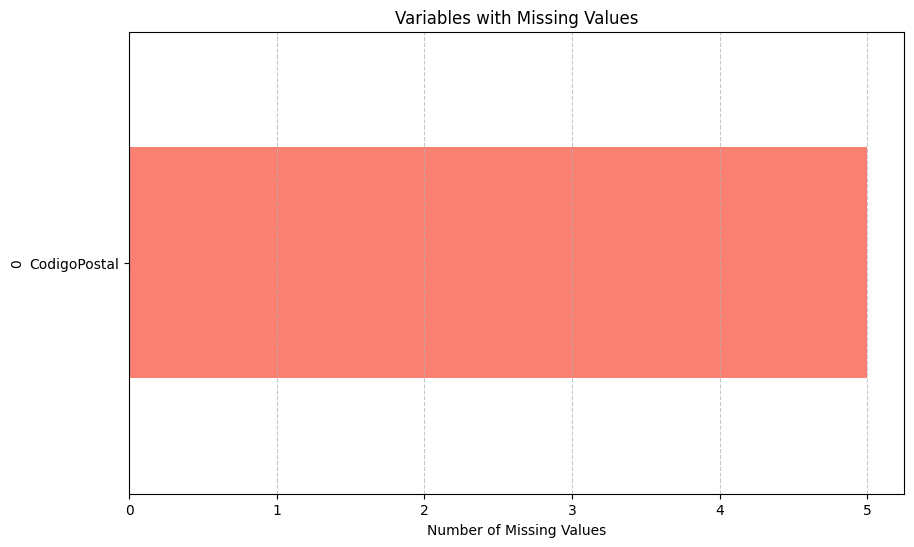

In [15]:
# 4. Variables with missing values
    # Detect columns with missing values and show the percentage
print("\n📌 Variables with missing values:")

# Count missing values by column
missing = df_eda.isnull().sum()

# Filter only columns with missing values
missing = missing[missing > 0].sort_values(ascending=False)

# Calculate missing percentage
missing_percentage = (missing / len(df_eda)) * 100

# Create a DataFrame to show the count and percentage of missing values
missing_df = pd.DataFrame({'Total Missing': missing, 'Percentage Missing': missing_percentage})

# If missing values exist, display a bar chart of missing values distribution
if not missing.empty:
    display(missing_df)
    plt.figure(figsize=(10, 6))
    missing.plot(kind='barh', color='salmon')  # Horizontal bar chart
    plt.title("Variables with Missing Values")
    plt.xlabel("Number of Missing Values")
    plt.gca().invert_yaxis()  # Invert y-axis to show variables with most missing values first
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Add grid to the chart
    plt.show()
else:
    print("✅ No missing values in the dataset.")

#### ¿HAY DUPLICADOS?

In [16]:
print("\n🔍 Duplicate Rows:")

# Count how many rows are duplicates
duplicated_rows = df_eda.duplicated().sum()
if duplicated_rows > 0:
    print("🔴 Duplicate Rows:")
    display(df_eda[df_eda.duplicated()])  # Show duplicate rows
else:
    print('No duplicate rows')

# Check for duplicate columns
print("\n🔍 Duplicate Columns:")

# Transpose the df_edaFrame to check for duplicate columns
duplicated_columns = df_eda.T.duplicated().sum()
if duplicated_columns > 0:
    display(df_eda[df_eda.duplicated()])  # Show duplicate columns
else:
    print('No duplicate columns')


🔍 Duplicate Rows:
No duplicate rows

🔍 Duplicate Columns:
No duplicate columns


#### FILTRO FECHA CORTE Y ONE-HOT ENCODER GENERO

In [17]:
df_features= df_eda.copy()

In [18]:
df_features_1sep25= df_features[df_features['FAntiguedad']<= '2025-09-1']
df_features_1sep25= df_features[df_features['FechaÚltimaAlta']<= '2025-09-1']
df_one_hot_tipo_genero = pd.get_dummies(df_features_1sep25['Sexo'], prefix='Sexo', drop_first=True)
df_features_1sep25 = pd.concat([df_features_1sep25, df_one_hot_tipo_genero], axis=1)
df_features_1sep25= df_features_1sep25.drop(columns=['Sexo', 'DireccionCompleta', 'CodigoPostal'])
df_features_1sep25

,IdPersona,Edad,FNacimiento,FechaÚltimaAlta,FAntiguedad,TipoAbonoActual,Sexo_Mujer
0,334,82.0,1942-12-04,2011-03-22,1955-11-29,AVET - ABONATS VETERANS,False
1,452,85.0,1940-08-01,1956-09-18,1956-09-18,AVET - ABONATS VETERANS,False
2,642,77.0,1948-02-02,2011-03-22,1958-03-05,AVET - ABONATS VETERANS,False
3,849,85.0,1940-04-10,1958-08-04,1958-08-04,CL04 - JUBILATS SENSE DRET A US,False
4,891,78.0,1946-09-23,2011-03-22,1959-01-07,AVET - ABONATS VETERANS,False
...,...,...,...,...,...,...,...
5550,117425,30.0,1995-02-11,2025-09-01,2025-09-01,AA00 - ADULTS ( 26 A 64 ANYS ),False
5551,117426,46.0,1979-08-05,2025-09-01,2025-09-01,AA00 - ADULTS ( 26 A 64 ANYS ),True
5552,117427,20.0,2004-11-19,2025-09-01,2025-09-01,JO00 - QUOTA DESCOMPTE JOVE (DE 18 A 25 ANYS),False
5651,117537,16.0,2008-11-18,2025-09-01,2025-09-01,AM00 - INFANTIL (DE 6 A 17 ANYS),False


#### TRATAMIENTO ABONOS

In [19]:
tipos_a_excluir = ["EMP0 - EMPLEADOS CLUB SIN CUOTA", "EMP1 - EMPLEATS D'ALTRES EMPRESES", "CL02 - SOCIS NUMERARIS", "CL01 - SOCIS D'HONOR"]
df_activos_filtrado = df_features_1sep25[~df_features_1sep25['TipoAbonoActual'].isin(tipos_a_excluir)].reset_index(drop=True)
df_activos_filtrado

,IdPersona,Edad,FNacimiento,FechaÚltimaAlta,FAntiguedad,TipoAbonoActual,Sexo_Mujer
0,334,82.0,1942-12-04,2011-03-22,1955-11-29,AVET - ABONATS VETERANS,False
1,452,85.0,1940-08-01,1956-09-18,1956-09-18,AVET - ABONATS VETERANS,False
2,642,77.0,1948-02-02,2011-03-22,1958-03-05,AVET - ABONATS VETERANS,False
3,849,85.0,1940-04-10,1958-08-04,1958-08-04,CL04 - JUBILATS SENSE DRET A US,False
4,891,78.0,1946-09-23,2011-03-22,1959-01-07,AVET - ABONATS VETERANS,False
...,...,...,...,...,...,...,...
5322,117425,30.0,1995-02-11,2025-09-01,2025-09-01,AA00 - ADULTS ( 26 A 64 ANYS ),False
5323,117426,46.0,1979-08-05,2025-09-01,2025-09-01,AA00 - ADULTS ( 26 A 64 ANYS ),True
5324,117427,20.0,2004-11-19,2025-09-01,2025-09-01,JO00 - QUOTA DESCOMPTE JOVE (DE 18 A 25 ANYS),False
5325,117537,16.0,2008-11-18,2025-09-01,2025-09-01,AM00 - INFANTIL (DE 6 A 17 ANYS),False


| AbonoOriginal                                               | CodigoAbono |
|-------------------------------------------------------------|-------------|
| AA00 - ADULTS ( 26 A 64 ANYS )                              | AA00        |
| AR00 - TARJA ROSA (TARJETA GRATUÏTA)                        | AR00        |
| JO00 - QUOTA DESCOMPTE JOVE (DE 18 A 25 ANYS)               | JO00        |
| AG00 - GENT GRAN (MES DE 65 ANYS)                           | AG00        |
| AT01 - ATUR TOTAL                                           | AT01        |
| AF00 - ADULTS C.S. (DIVENDRES TARDA MES CAP DE...           | AF00        |
| MA00 - ADULTS MATINS ( DE 7 A 16 MES CAPS DE S...           | MA00        |
| CR01 - CARNET ROSA (TARJETA REDUÏDA)                        | CR01        |
| FAMILIAR (PARES MES ELS MENORS DE 18 ANYS)                  | FA00        |
| QUOTA MANTENIMENT - MENSUAL                                 | QM01        |
| AG03 - GENT GRAN - TRIMESTRAL                               | AG03        |
| AM00 - INFANTIL (DE 6 A 17 ANYS)                             | AM00        |
| ATURATS MATI                                                | AT00        |
| AT00 - ATUR MATI                                            | AT00        |
| AC00 - COMERCIANTS (DE 7 A 9 I DE 13 A 17 MES ...            | AC00        |
| TEMP                                                        | TMP         |
| AA03 - ADULTS - TRIMESTRAL                                  | AA03        |
| MA03 - ADULTS MATINS - TRIMESTRAL                           | MA03        |
| AA12 - ADULTS - ANUAL                                       | AA12        |
| ATURATS TOTAL                                               | AT01        |
| FAMILIAR MONOPARENTAL (AMB CARNET MONOPARENTAL)             | FM01        |
| AR03 - TARJA ROSA - TRIMESTRAL                              | AR03        |
| MA06 - ADULTS MATINS - SEMESTRAL                            | MA06        |
| AVET - ABONATS VETERANS                                     | AVET        |
| AC03 - COMERCIANTS - TRIMESTRAL                             | AC03        |
| JO03 - QUOTA TRIMESTRAL JOVE                                | JO03        |
| FAMILIAR ANUAL                                              | FA12        |
| AP03 - PREINFANTIL3-5                                       | AP03        |
| AP00 - PREINFANTIL0-2                                       | AP00        |
| AF03 - ADULTS C.S - TRIMESTRAL                              | AF03        |
| AG12 - GENT GRAN - ANUAL                                    | AG12        |
| AM03 - INFANTIL-TRIMESTRAL                                  | AM03        |
| EMPF - FAMILIAR EMPLEADO                                    | EMPF        |
| CR03 - CARNET ROSA - TRIMESTRAL                             | CR03        |
| NI00 - ADULTS NITS                                          | NI00        |
| VIP                                                         | VIP         |
| CL04 - JUBILATS SENSE DRET A US                             | CL04        |
| QUOTA MANTENIMENT - TRIM.                                   | QM03        |
| MA12 - ADULTS MATINS ANUALS                                 | MA12        |
| AR12 - TARJA ROSA - ANUAL                                   | AR12        |
| APG03-GROUPON-SEMESTRAL                                     | APG03        |
| APG04-GROUPON-ANUAL                                     | APG04        |
| T07 - QUOTA I-10                                     | T07        |
| T12 - QUOTA TR-25                                     | T12        |
| T14 - QUOTA TR-15                                     | T14        |
| T16 - QUOTA                                     | T16        |
| T15 - QUOTA TR-10                                     | T15        |



In [20]:
import re
# Regex para detectar códigos como "XXXX - ..."
patron_codigo = re.compile(r"^([A-Z0-9]{4})\s-\s")

# Diccionario de códigos manuales para los que no tienen formato
mapeo_manual = {
    'FAMILIAR (PARES MES ELS MENORS DE 18 ANYS)': 'FA00',
    'QUOTA MANTENIMENT - MENSUAL': 'QM01',
    'FAMILIAR MONOPARENTAL (AMB CARNET MONOPARENTAL)': 'FM01',
    'TEMP': 'TEMP',
    'VIP': 'VIP',
    'FAMILIAR ANUAL': 'FA12',
    'QUOTA MANTENIMENT - TRIM.': 'QM03',
    'ATURATS TOTAL': 'AT01',
    'ATURATS MATI': 'AT00',
    "AA0 - PROMO 9'90€ (PRIMER MES)": 'AA0',
    "APG03-GROUPON-SEMESTRAL": 'APG03',
    "APG04-GROUPON-ANUAL": 'APG04',
    "T07 - QUOTA I-10": 'T07',
    "T12 - QUOTA TR-25": 'T12',
    "T14 - QUOTA TR-15": 'T14',
    "T16 - QUOTA": 'T16',
    "T15 - QUOTA TR-10": 'T15'
}

# Función de limpieza que puedes aplicar a cualquier columna
def extraer_codigo_abono(abono):
    if pd.isna(abono):
        return None
    match = patron_codigo.match(abono)
    if match:
        return match.group(1)
    return mapeo_manual.get(abono, abono)  # Si no hay código, mira si está en el mapeo

# Aplicar a la columna deseada
df_activos_filtrado['TipoAbonoActual'] = df_activos_filtrado['TipoAbonoActual'].apply(extraer_codigo_abono)
df_activos_filtrado

,IdPersona,Edad,FNacimiento,FechaÚltimaAlta,FAntiguedad,TipoAbonoActual,Sexo_Mujer
0,334,82.0,1942-12-04,2011-03-22,1955-11-29,AVET,False
1,452,85.0,1940-08-01,1956-09-18,1956-09-18,AVET,False
2,642,77.0,1948-02-02,2011-03-22,1958-03-05,AVET,False
3,849,85.0,1940-04-10,1958-08-04,1958-08-04,CL04,False
4,891,78.0,1946-09-23,2011-03-22,1959-01-07,AVET,False
...,...,...,...,...,...,...,...
5322,117425,30.0,1995-02-11,2025-09-01,2025-09-01,AA00,False
5323,117426,46.0,1979-08-05,2025-09-01,2025-09-01,AA00,True
5324,117427,20.0,2004-11-19,2025-09-01,2025-09-01,JO00,False
5325,117537,16.0,2008-11-18,2025-09-01,2025-09-01,AM00,False


Después da valorar sobre la calidad de los datos y también del tiempo que dispongo se toma la decisión de:

    -No se utilizar las altas en detalle de los abonados.
    -No utilizar la columna dirección y codigo postal.

FUTURO TRABAJO!!!

### - ARCHIVO CLIENTES DE BAJA DE 1/9/24 al 1/9/25

In [21]:
abonado_bajas = load_dataset('../data/Baixes Abonats 01.09.2024 a 01.09.2024 - data ant.xlsx')

In [22]:
abonado_bajas= abonado_bajas[:3532]

#### DEA

In [27]:
df_bajas = abonado_bajas.copy()

In [28]:
df_bajas=df_bajas.rename(columns={'TipoAbono': 'TipoAbonoMomentoBaja', 'FechaAlta': 'FechaAltaMomentoBaja'}  )
df_bajas

,IdPersona,TipoAbonoMomentoBaja,FAntiguedad,FechaAltaMomentoBaja,Edad,Sexo,FNacimiento,DireccionCompleta,FechaBaja,MotivoBaja
0,7801,AG00 - GENT GRAN (MES DE 65 ANYS),26/06/2024,26/06/2024,83,Mujer,06/12/1941,"CARRER CHAPI, 77",01/10/2024,Raons personals
1,10389,AR00 - TARJA ROSA (TARJETA GRATUÏTA),12/06/1981,01/01/2012,81,Mujer,14/01/1944,"PASSEIG UNIVERSAL, 56-58 2-2",01/02/2025,Problemas de salud
2,11780,AG00 - GENT GRAN (MES DE 65 ANYS),30/09/1982,01/03/2018,80,Mujer,05/03/1945,"CARRER SALSES, 100 BLQ-C 2-2",01/08/2025,Vacances
3,13103,AG00 - GENT GRAN (MES DE 65 ANYS),27/04/1984,17/03/2011,85,Hombre,25/03/1940,"CARRER MESTRE DALMAU, 22 1",01/03/2025,No Utilitzar les Instal.lacions
4,13104,AG00 - GENT GRAN (MES DE 65 ANYS),27/04/1984,17/03/2011,83,Mujer,13/08/1942,"CARRER MESTRE DALMAU, 22 1",01/03/2025,No Utilitzar les Instal.lacions
...,...,...,...,...,...,...,...,...,...,...
3527,117348,AA00 - ADULTS ( 26 A 64 ANYS ),25/08/2025,25/08/2025,36,Hombre,25/05/1989,"CARRER CAMPOAMOR, 24",25/08/2025,(nulo)
3528,117352,AA00 - ADULTS ( 26 A 64 ANYS ),26/08/2025,26/08/2025,50,Mujer,28/02/1975,"CARRER RECTORIA, 27",28/08/2025,(nulo)
3529,117370,AG00 - GENT GRAN (MES DE 65 ANYS),29/08/2025,29/08/2025,73,Mujer,27/03/1952,"CARRER CARTELLA, 134 3-2",29/08/2025,(nulo)
3530,117421,AA0 - PROMO 9'90€ (PRIMER MES),01/09/2025,01/09/2025,26,Mujer,15/04/1999,"CARRER COIMBRA, 30 2-4",01/09/2025,(nulo)


##### TRATAMIENTO DEL TIPADO DE LAS COLUMNAS

In [29]:
cols_object = ["IdPersona"]  # pon aquí las que quieras

for col in cols_object:
    df_bajas[col] = df_bajas[col].astype('object')

In [30]:
cols_fechas = ["FechaAltaMomentoBaja", "FechaBaja", 'FNacimiento']

for col in cols_fechas:
    df_bajas[col] = pd.to_datetime(df_bajas[col], errors="coerce", dayfirst=True)

##### ¿Hay duplicados?

In [31]:
print("\n🔍 Duplicate Rows:")

# Count how many rows are duplicates
duplicated_rows = df_bajas.duplicated().sum()
if duplicated_rows > 0:
    print("🔴 Duplicate Rows:")
    display(df_bajas[df_bajas.duplicated()])  # Show duplicate rows
else:
    print('No duplicate rows')

# Check for duplicate columns
print("\n🔍 Duplicate Columns:")

# Transpose the abonado_altasFrame to check for duplicate columns
duplicated_columns = df_bajas.T.duplicated().sum()
if duplicated_columns > 0:
    display(df_bajas[df_bajas.duplicated()])  # Show duplicate columns
else:
    print('No duplicate columns')


🔍 Duplicate Rows:
No duplicate rows

🔍 Duplicate Columns:
No duplicate columns


##### ¿Hay nulos?

In [32]:
# 4. Variables with missing values
    # Detect columns with missing values and show the percentage
print("\n📌 Variables with missing values:")

# Count missing values by column
missing = df_bajas.isnull().sum()

# Filter only columns with missing values
missing = missing[missing > 0].sort_values(ascending=False)

# Calculate missing percentage
missing_percentage = (missing / len(df_bajas)) * 100

# Create a DataFrame to show the count and percentage of missing values
missing_df = pd.DataFrame({'Total Missing': missing, 'Percentage Missing': missing_percentage})

# If missing values exist, display a bar chart of missing values distribution
if not missing.empty:
    display(missing_df)
    plt.figure(figsize=(10, 6))
    missing.plot(kind='barh', color='salmon')  # Horizontal bar chart
    plt.title("Variables with Missing Values")
    plt.xlabel("Number of Missing Values")
    plt.gca().invert_yaxis()  # Invert y-axis to show variables with most missing values first
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Add grid to the chart
    plt.show()
else:
    print("✅ No missing values in the dataset.")


📌 Variables with missing values:
✅ No missing values in the dataset.


#### - FEATURE ENGINEERING ARCHIVO BAJAS

Se realiza como en el archivo de abonados activos una pequeño filtro. Se excluyen los abonados que se han dado de baja que no forman parte y no interfieren directamente al numero de socios. Tal como los abonados con abonos antiguos, que no pagan, y también empleados del gimnasio.

In [33]:
tipos_a_excluir = ["EMP0 - EMPLEADOS CLUB SIN CUOTA", "EMP1 - EMPLEATS D'ALTRES EMPRESES", "CL02 - SOCIS NUMERARIS", "CL01 - SOCIS D'HONOR"]
df_bajas_filtrado = df_bajas[~df_bajas['TipoAbonoMomentoBaja'].isin(tipos_a_excluir)].reset_index(drop=True)
df_bajas_filtrado

,IdPersona,TipoAbonoMomentoBaja,FAntiguedad,FechaAltaMomentoBaja,Edad,Sexo,FNacimiento,DireccionCompleta,FechaBaja,MotivoBaja
0,7801,AG00 - GENT GRAN (MES DE 65 ANYS),26/06/2024,2024-06-26,83,Mujer,1941-12-06,"CARRER CHAPI, 77",2024-10-01,Raons personals
1,10389,AR00 - TARJA ROSA (TARJETA GRATUÏTA),12/06/1981,2012-01-01,81,Mujer,1944-01-14,"PASSEIG UNIVERSAL, 56-58 2-2",2025-02-01,Problemas de salud
2,11780,AG00 - GENT GRAN (MES DE 65 ANYS),30/09/1982,2018-03-01,80,Mujer,1945-03-05,"CARRER SALSES, 100 BLQ-C 2-2",2025-08-01,Vacances
3,13103,AG00 - GENT GRAN (MES DE 65 ANYS),27/04/1984,2011-03-17,85,Hombre,1940-03-25,"CARRER MESTRE DALMAU, 22 1",2025-03-01,No Utilitzar les Instal.lacions
4,13104,AG00 - GENT GRAN (MES DE 65 ANYS),27/04/1984,2011-03-17,83,Mujer,1942-08-13,"CARRER MESTRE DALMAU, 22 1",2025-03-01,No Utilitzar les Instal.lacions
...,...,...,...,...,...,...,...,...,...,...
3480,117348,AA00 - ADULTS ( 26 A 64 ANYS ),25/08/2025,2025-08-25,36,Hombre,1989-05-25,"CARRER CAMPOAMOR, 24",2025-08-25,(nulo)
3481,117352,AA00 - ADULTS ( 26 A 64 ANYS ),26/08/2025,2025-08-26,50,Mujer,1975-02-28,"CARRER RECTORIA, 27",2025-08-28,(nulo)
3482,117370,AG00 - GENT GRAN (MES DE 65 ANYS),29/08/2025,2025-08-29,73,Mujer,1952-03-27,"CARRER CARTELLA, 134 3-2",2025-08-29,(nulo)
3483,117421,AA0 - PROMO 9'90€ (PRIMER MES),01/09/2025,2025-09-01,26,Mujer,1999-04-15,"CARRER COIMBRA, 30 2-4",2025-09-01,(nulo)


#### FILTRO FECHA CORTE Y ONE-HOT ENCODER GENERO

In [34]:
df_bajas_filtrado['FAntiguedad'] = pd.to_datetime(df_bajas_filtrado['FAntiguedad'])
df_bajas_filtrado= df_bajas_filtrado[df_bajas_filtrado['FAntiguedad']<= '2025-09-01']
df_bajas_filtrado= df_bajas_filtrado[df_bajas_filtrado['FechaAltaMomentoBaja']<= '2025-09-01']
df_one_hot_tipo_genero = pd.get_dummies(df_bajas_filtrado['Sexo'], prefix='Sexo', drop_first=True)
df_bajas_filtrado = pd.concat([df_bajas_filtrado, df_one_hot_tipo_genero], axis=1)
df_bajas_filtrado

,IdPersona,TipoAbonoMomentoBaja,FAntiguedad,FechaAltaMomentoBaja,Edad,Sexo,FNacimiento,DireccionCompleta,FechaBaja,MotivoBaja,Sexo_Mujer
0,7801,AG00 - GENT GRAN (MES DE 65 ANYS),2024-06-26,2024-06-26,83,Mujer,1941-12-06,"CARRER CHAPI, 77",2024-10-01,Raons personals,True
1,10389,AR00 - TARJA ROSA (TARJETA GRATUÏTA),1981-06-12,2012-01-01,81,Mujer,1944-01-14,"PASSEIG UNIVERSAL, 56-58 2-2",2025-02-01,Problemas de salud,True
2,11780,AG00 - GENT GRAN (MES DE 65 ANYS),1982-09-30,2018-03-01,80,Mujer,1945-03-05,"CARRER SALSES, 100 BLQ-C 2-2",2025-08-01,Vacances,True
3,13103,AG00 - GENT GRAN (MES DE 65 ANYS),1984-04-27,2011-03-17,85,Hombre,1940-03-25,"CARRER MESTRE DALMAU, 22 1",2025-03-01,No Utilitzar les Instal.lacions,False
4,13104,AG00 - GENT GRAN (MES DE 65 ANYS),1984-04-27,2011-03-17,83,Mujer,1942-08-13,"CARRER MESTRE DALMAU, 22 1",2025-03-01,No Utilitzar les Instal.lacions,True
...,...,...,...,...,...,...,...,...,...,...,...
3480,117348,AA00 - ADULTS ( 26 A 64 ANYS ),2025-08-25,2025-08-25,36,Hombre,1989-05-25,"CARRER CAMPOAMOR, 24",2025-08-25,(nulo),False
3481,117352,AA00 - ADULTS ( 26 A 64 ANYS ),2025-08-26,2025-08-26,50,Mujer,1975-02-28,"CARRER RECTORIA, 27",2025-08-28,(nulo),True
3482,117370,AG00 - GENT GRAN (MES DE 65 ANYS),2025-08-29,2025-08-29,73,Mujer,1952-03-27,"CARRER CARTELLA, 134 3-2",2025-08-29,(nulo),True
3483,117421,AA0 - PROMO 9'90€ (PRIMER MES),2025-09-01,2025-09-01,26,Mujer,1999-04-15,"CARRER COIMBRA, 30 2-4",2025-09-01,(nulo),True


In [35]:
df_bajas_filtrado= df_bajas_filtrado.drop(columns=['Sexo', 'DireccionCompleta'])
df_bajas_filtrado

,IdPersona,TipoAbonoMomentoBaja,FAntiguedad,FechaAltaMomentoBaja,Edad,FNacimiento,FechaBaja,MotivoBaja,Sexo_Mujer
0,7801,AG00 - GENT GRAN (MES DE 65 ANYS),2024-06-26,2024-06-26,83,1941-12-06,2024-10-01,Raons personals,True
1,10389,AR00 - TARJA ROSA (TARJETA GRATUÏTA),1981-06-12,2012-01-01,81,1944-01-14,2025-02-01,Problemas de salud,True
2,11780,AG00 - GENT GRAN (MES DE 65 ANYS),1982-09-30,2018-03-01,80,1945-03-05,2025-08-01,Vacances,True
3,13103,AG00 - GENT GRAN (MES DE 65 ANYS),1984-04-27,2011-03-17,85,1940-03-25,2025-03-01,No Utilitzar les Instal.lacions,False
4,13104,AG00 - GENT GRAN (MES DE 65 ANYS),1984-04-27,2011-03-17,83,1942-08-13,2025-03-01,No Utilitzar les Instal.lacions,True
...,...,...,...,...,...,...,...,...,...
3480,117348,AA00 - ADULTS ( 26 A 64 ANYS ),2025-08-25,2025-08-25,36,1989-05-25,2025-08-25,(nulo),False
3481,117352,AA00 - ADULTS ( 26 A 64 ANYS ),2025-08-26,2025-08-26,50,1975-02-28,2025-08-28,(nulo),True
3482,117370,AG00 - GENT GRAN (MES DE 65 ANYS),2025-08-29,2025-08-29,73,1952-03-27,2025-08-29,(nulo),True
3483,117421,AA0 - PROMO 9'90€ (PRIMER MES),2025-09-01,2025-09-01,26,1999-04-15,2025-09-01,(nulo),True


#### -TRATAMIENTO TIPOS ABONO

Se realiza el mismo cambio de nombres para el tipo de abono en el momento de baja, como se ha relaizado en los socios activos


In [36]:
import re
# Regex para detectar códigos como "XXXX - ..."
patron_codigo = re.compile(r"^([A-Z0-9]{4})\s-\s")

# Diccionario de códigos manuales para los que no tienen formato
mapeo_manual = {
    'FAMILIAR (PARES MES ELS MENORS DE 18 ANYS)': 'FA00',
    'QUOTA MANTENIMENT - MENSUAL': 'QM01',
    'FAMILIAR MONOPARENTAL (AMB CARNET MONOPARENTAL)': 'FM01',
    'TEMP': 'TEMP',
    'VIP': 'VIP',
    'FAMILIAR ANUAL': 'FA12',
    'QUOTA MANTENIMENT - TRIM.': 'QM03',
    'ATURATS TOTAL': 'AT01',
    'ATURATS MATI': 'AT00',
    "AA0 - PROMO 9'90€ (PRIMER MES)": 'AA0',
    "APG03-GROUPON-SEMESTRAL": 'APG03',
    "APG04-GROUPON-ANUAL": 'APG04',
    "T07 - QUOTA I-10": 'T07',
    "T12 - QUOTA TR-25": 'T12',
    "T14 - QUOTA TR-15": 'T14',
    "T16 - QUOTA": 'T16',
    "T15 - QUOTA TR-10": 'T15'
    
}

# Aplicar a la columna deseada
df_bajas_filtrado['TipoAbonoMomentoBaja'] = df_bajas_filtrado['TipoAbonoMomentoBaja'].apply(extraer_codigo_abono)
df_bajas_filtrado

,IdPersona,TipoAbonoMomentoBaja,FAntiguedad,FechaAltaMomentoBaja,Edad,FNacimiento,FechaBaja,MotivoBaja,Sexo_Mujer
0,7801,AG00,2024-06-26,2024-06-26,83,1941-12-06,2024-10-01,Raons personals,True
1,10389,AR00,1981-06-12,2012-01-01,81,1944-01-14,2025-02-01,Problemas de salud,True
2,11780,AG00,1982-09-30,2018-03-01,80,1945-03-05,2025-08-01,Vacances,True
3,13103,AG00,1984-04-27,2011-03-17,85,1940-03-25,2025-03-01,No Utilitzar les Instal.lacions,False
4,13104,AG00,1984-04-27,2011-03-17,83,1942-08-13,2025-03-01,No Utilitzar les Instal.lacions,True
...,...,...,...,...,...,...,...,...,...
3480,117348,AA00,2025-08-25,2025-08-25,36,1989-05-25,2025-08-25,(nulo),False
3481,117352,AA00,2025-08-26,2025-08-26,50,1975-02-28,2025-08-28,(nulo),True
3482,117370,AG00,2025-08-29,2025-08-29,73,1952-03-27,2025-08-29,(nulo),True
3483,117421,AA0,2025-09-01,2025-09-01,26,1999-04-15,2025-09-01,(nulo),True


OBSERVACIÓN: Se decide obviar utilizar el motivo de la baja por temas de tiempo para la entrega del MVP. 

TRABAJO FUTURO Y ESCALABLE

In [37]:
df_bajas_filtrado= df_bajas_filtrado.drop(columns=['MotivoBaja', 'FNacimiento'])
df_bajas_filtrado

,IdPersona,TipoAbonoMomentoBaja,FAntiguedad,FechaAltaMomentoBaja,Edad,FechaBaja,Sexo_Mujer
0,7801,AG00,2024-06-26,2024-06-26,83,2024-10-01,True
1,10389,AR00,1981-06-12,2012-01-01,81,2025-02-01,True
2,11780,AG00,1982-09-30,2018-03-01,80,2025-08-01,True
3,13103,AG00,1984-04-27,2011-03-17,85,2025-03-01,False
4,13104,AG00,1984-04-27,2011-03-17,83,2025-03-01,True
...,...,...,...,...,...,...,...
3480,117348,AA00,2025-08-25,2025-08-25,36,2025-08-25,False
3481,117352,AA00,2025-08-26,2025-08-26,50,2025-08-28,True
3482,117370,AG00,2025-08-29,2025-08-29,73,2025-08-29,True
3483,117421,AA0,2025-09-01,2025-09-01,26,2025-09-01,True


#### -TRATAMIENTO DE ABONADOS CON ID DUPLICADO

Se detectan casos donde ciertos abonados han tenido más de una baja en el periodo. Se decide tratar y coger la fecha de antiguedad más lejana y la fecha de baja más cercana a la fecha de corte para poder coger toda la vida del abonado dado de baja

In [38]:
idpersonas_duplicadas = df_bajas_filtrado['IdPersona'].value_counts()
idpersonas_duplicadas = idpersonas_duplicadas[idpersonas_duplicadas > 1].index

In [39]:
# Registros de personas con más de una baja
df_bajas_duplicadas = df_bajas_filtrado[df_bajas_filtrado['IdPersona'].isin(idpersonas_duplicadas)].copy()

# Registros únicos (solo una baja registrada)
df_bajas_unicas = df_bajas_filtrado[~df_bajas_filtrado['IdPersona'].isin(idpersonas_duplicadas)].copy()

In [40]:
# Ordenar por FechaBaja para luego tomar el último registro por persona
df_bajas_duplicadas_sorted = df_bajas_duplicadas.sort_values(['IdPersona', 'FechaBaja'])

# Crear DataFrame consolidado
df_bajas_consolidadas = df_bajas_duplicadas_sorted.groupby('IdPersona').agg({
    'FAntiguedad': 'min',
    'FechaBaja': 'max'
}).reset_index()

# Para conservar las columnas del último registro, usamos tail(1)
últimos_registros = df_bajas_duplicadas_sorted.groupby('IdPersona').tail(1)[[
    'IdPersona', 'TipoAbonoMomentoBaja', 'FechaAltaMomentoBaja', 'Edad', 'Sexo_Mujer'
]]

# Unimos ambos
df_bajas_consolidadas = df_bajas_consolidadas.merge(últimos_registros, on='IdPersona', how='left')
# Contar cuántas fechas de alta distintas tuvo cada persona
reincorporaciones = df_bajas_duplicadas.groupby('IdPersona')['FechaAltaMomentoBaja'].nunique()
df_irregular = (reincorporaciones > 1).reset_index().rename(columns={'FechaAltaMomentoBaja': 'Irregular'})

# Unimos la columna 'Irregular'
df_bajas_consolidadas = df_bajas_consolidadas.merge(df_irregular, on='IdPersona', how='left')
df_bajas_consolidadas['Irregular'] = df_bajas_consolidadas['Irregular'].fillna(False)

In [41]:
df_bajas_final = pd.concat([df_bajas_unicas, df_bajas_consolidadas], ignore_index=True)
df_bajas_final['Irregular'] = df_bajas_final['Irregular'].fillna(False)

Comprobamos que ahora hay el número de personas unicas que tendrian que dar y que no hay IDs de abonados duplicados

In [42]:
print(len(df_bajas_final))  # Debería ser igual al número de personas únicas (3244)
print(df_bajas_final['IdPersona'].duplicated().sum())  # Debería ser 0

3244
0


# - FEATURE ENGINEERING ARCHIVO ABONADOS ACTIVOS Y NO ACTIVOS

Se estudia si hay abonados que estan a nivel comun en los dos datasets de activos y dados de baja

In [43]:
df_activos_filtrado['IdPersona'] = df_activos_filtrado['IdPersona'].astype(str)
df_bajas_final['IdPersona'] = df_bajas_final['IdPersona'].astype(str)

# Ids de activos y bajas
ids_activos = set(df_activos_filtrado['IdPersona'])
ids_bajas = set(df_bajas_final['IdPersona'])

# IDs que están en ambos
ids_duplicados = ids_activos.intersection(ids_bajas)

print(f"Hay {len(ids_duplicados)} personas que aparecen en activos y bajas.")

Hay 386 personas que aparecen en activos y bajas.


In [44]:
# Filtrar en activos y bajas las personas repetidas para revisar
activos_duplicados = df_activos_filtrado[df_activos_filtrado['IdPersona'].isin(ids_duplicados)]
bajas_duplicados = df_bajas_final[df_bajas_final['IdPersona'].isin(ids_duplicados)]

# Ejemplo para ver cómo son
print(activos_duplicados)
print(bajas_duplicados)

     IdPersona  Edad FNacimiento FechaÚltimaAlta FAntiguedad  \
33        7801  83.0  1941-12-06      2018-07-01  1978-12-14   
66       11780  80.0  1945-03-05      2011-07-01  1982-09-30   
78       13180  78.0  1946-10-15      2024-10-15  2024-10-15   
92       14339  78.0  1946-12-14      2017-09-01  1986-01-02   
106      15471  70.0  1955-04-18      2025-02-26  2025-02-26   
...        ...   ...         ...             ...         ...   
5259    117348  36.0  1989-05-25      2025-09-01  2025-09-01   
5262    117352  50.0  1975-02-28      2025-09-01  2025-09-01   
5275    117370  73.0  1952-03-27      2025-09-01  2025-09-01   
5318    117421  26.0  1999-04-15      2025-09-01  2025-09-01   
5320    117423  54.0  1970-10-27      2025-09-01  2025-09-01   

        TipoAbonoActual  Sexo_Mujer  
33                 QM01        True  
66    T08 - QUOTA TR-30        True  
78                 AG00       False  
92    T08 - QUOTA TR-30        True  
106                CR01        True  
...

In [45]:
# IDs duplicados (ya convertidos a string)
ids_duplicados = ids_activos.intersection(ids_bajas)

# Filtramos las filas que corresponden a esos IDs en ambos DataFrames
activos_duplicados = df_activos_filtrado[df_activos_filtrado['IdPersona'].isin(ids_duplicados)].copy()
bajas_duplicados = df_bajas_final[df_bajas_final['IdPersona'].isin(ids_duplicados)].copy()

In [46]:
print("Activos duplicados resumen:")
print(activos_duplicados.describe(include='all'))

print("\nBajas duplicados resumen:")
print(bajas_duplicados.describe(include='all'))

Activos duplicados resumen:
       IdPersona        Edad                    FNacimiento  \
count        386  386.000000                            386   
unique       386         NaN                            NaN   
top         7801         NaN                            NaN   
freq           1         NaN                            NaN   
mean         NaN   38.401554  1986-10-21 06:24:14.922279808   
min          NaN    2.000000            1931-02-06 00:00:00   
25%          NaN   21.000000            1973-04-26 06:00:00   
50%          NaN   36.000000            1989-01-25 00:00:00   
75%          NaN   52.000000            2003-11-19 00:00:00   
max          NaN   94.000000            2023-04-05 00:00:00   
std          NaN   20.061902                            NaN   

                      FechaÚltimaAlta                    FAntiguedad  \
count                             386                            386   
unique                            NaN                            NaN   

In [47]:
df_comparacion = activos_duplicados.merge(
    bajas_duplicados,
    on='IdPersona',
    suffixes=('_activo', '_baja')
)

df_comparacion.head(10)

,IdPersona,Edad_activo,FNacimiento,FechaÚltimaAlta,FAntiguedad_activo,TipoAbonoActual,Sexo_Mujer_activo,TipoAbonoMomentoBaja,FAntiguedad_baja,FechaAltaMomentoBaja,Edad_baja,FechaBaja,Sexo_Mujer_baja,Irregular
0,7801,83.0,1941-12-06,2018-07-01,1978-12-14,QM01,True,AG00,2024-06-26,2024-06-26,83,2024-10-01,True,False
1,11780,80.0,1945-03-05,2011-07-01,1982-09-30,T08 - QUOTA TR-30,True,AG00,1982-09-30,2018-03-01,80,2025-08-01,True,False
2,13180,78.0,1946-10-15,2024-10-15,2024-10-15,AG00,False,AG00,1984-05-18,2011-03-17,78,2024-09-01,False,False
3,14339,78.0,1946-12-14,2017-09-01,1986-01-02,T08 - QUOTA TR-30,True,CR01,2024-09-01,2024-09-01,78,2025-08-01,True,False
4,15471,70.0,1955-04-18,2025-02-26,2025-02-26,CR01,True,CR01,1988-01-04,2016-04-01,70,2025-01-01,True,False
5,16770,94.0,1931-02-06,2018-08-01,1990-01-05,QM01,True,AG00,2024-08-28,2024-08-28,94,2025-07-01,True,False
6,19025,63.0,1961-11-30,2024-10-30,2024-10-30,AA00,True,AA00,2022-03-26,2022-03-26,63,2024-10-01,True,False
7,21081,81.0,1943-12-28,2018-08-01,1995-04-28,QM01,True,AG00,2024-06-26,2024-06-26,81,2024-10-01,True,False
8,21770,33.0,1992-04-03,2013-05-01,1996-03-01,JO00,False,MA00,2024-08-26,2024-08-26,33,2024-10-01,False,False
9,22423,50.0,1975-01-20,2019-01-01,1996-12-31,QM01,True,AA00,2023-10-03,2023-10-03,50,2024-11-12,True,False


In [48]:
df_comparacion['FechaBaja'] = pd.to_datetime(df_comparacion['FechaBaja'])
df_comparacion['FechaÚltimaAlta'] = pd.to_datetime(df_comparacion['FechaÚltimaAlta'])

# Si la baja es posterior a la última alta => inconsistencia probable
df_comparacion['Conflicto_Fecha'] = df_comparacion['FechaBaja'] > df_comparacion['FechaÚltimaAlta']

In [49]:
df_comparacion['Conflicto_Fecha'].value_counts()

Conflicto_Fecha
False    337
True      49
Name: count, dtype: int64

In [50]:
df_comparacion['AbonoDistinto'] = df_comparacion['TipoAbonoActual'] != df_comparacion['TipoAbonoMomentoBaja']

In [51]:
df_comparacion['AbonoDistinto'].value_counts()  

AbonoDistinto
False    241
True     145
Name: count, dtype: int64

Después de realizar un pequeño análisis se ha decidido simplificar el caso y eliminar los abonados conflictivos para simplificar y quitar datos ambiguos. 

In [52]:
# Asegúrate de que los IdPersona estén como string
df_activos_filtrado['IdPersona'] = df_activos_filtrado['IdPersona'].astype(str)
df_bajas_final['IdPersona'] = df_bajas_final['IdPersona'].astype(str)

# Detectar duplicados
ids_duplicados = set(df_activos_filtrado['IdPersona']).intersection(df_bajas_final['IdPersona'])

# Eliminar de activos a los que también están en bajas
df_activos_limpio = df_activos_filtrado[~df_activos_filtrado['IdPersona'].isin(ids_duplicados)].copy()

In [53]:
# Añadir columna de estado
df_activos_limpio['Estado'] = 'Activo'
df_bajas_final['Estado'] = 'Baja'

# Unir en un solo DataFrame
df_usuarios_final = pd.concat([df_activos_limpio, df_bajas_final], ignore_index=True)
df_usuarios_final['Churn'] = df_usuarios_final['Estado'].map({'Activo': 0, 'Baja': 1})
df_usuarios_final= df_usuarios_final.drop(columns= ['Estado','FNacimiento'])

In [54]:
# Asegúrate de tener las fechas en formato datetime
df_usuarios_final['FAntiguedad'] = pd.to_datetime(df_usuarios_final['FAntiguedad'], errors='coerce')
df_usuarios_final['FechaBaja'] = pd.to_datetime(df_usuarios_final['FechaBaja'], errors='coerce')

# Fecha de referencia para activos
fecha_ref = pd.to_datetime('2025-09-01')

# Calcular la fecha de corte final para cada fila
df_usuarios_final['FechaCorte'] = df_usuarios_final['FechaBaja'].where(df_usuarios_final['Churn'] == 1, fecha_ref)

# Antigüedad en años hasta la fecha de corte correspondiente
df_usuarios_final['AntiguedadAños'] = round((df_usuarios_final['FechaCorte'] - df_usuarios_final['FAntiguedad']).dt.days / 365, 2)

Validamos que no hay inconcistencias en las fechas respecto a la fecha de antiguedad

In [56]:
condicion_invalida = df_usuarios_final['FechaAltaMomentoBaja'] < df_usuarios_final['FAntiguedad']
errores_fechas = df_usuarios_final[condicion_invalida]
print(f"Número de registros con error: {errores_fechas.shape[0]}")

Número de registros con error: 0


Se combinan ambas fechas de alta para los usuarios activos y de baja ya que se considera que es la ultima fecha de iscripicion en el centro

In [58]:
df_usuarios_final['FechaInicioUltimoAbono'] = df_usuarios_final['FechaAltaMomentoBaja'].combine_first(df_usuarios_final['FechaÚltimaAlta'])
df_usuarios_final['TipoUltimoAbono'] = df_usuarios_final['TipoAbonoActual'].combine_first(df_usuarios_final['TipoAbonoMomentoBaja'])
df_usuarios_final

,IdPersona,Edad,FechaÚltimaAlta,FAntiguedad,TipoAbonoActual,Sexo_Mujer,TipoAbonoMomentoBaja,FechaAltaMomentoBaja,FechaBaja,Irregular,Churn,FechaCorte,AntiguedadAños,FechaInicioUltimoAbono,TipoUltimoAbono
0,334,82.0,2011-03-22,1955-11-29,AVET,False,NaN,NaT,NaT,NaN,0,2025-09-01,69.81,2011-03-22,AVET
1,452,85.0,1956-09-18,1956-09-18,AVET,False,NaN,NaT,NaT,NaN,0,2025-09-01,69.00,1956-09-18,AVET
2,642,77.0,2011-03-22,1958-03-05,AVET,False,NaN,NaT,NaT,NaN,0,2025-09-01,67.54,2011-03-22,AVET
3,849,85.0,1958-08-04,1958-08-04,CL04,False,NaN,NaT,NaT,NaN,0,2025-09-01,67.12,1958-08-04,CL04
4,891,78.0,2011-03-22,1959-01-07,AVET,False,NaN,NaT,NaT,NaN,0,2025-09-01,66.70,2011-03-22,AVET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,116944,11.0,NaT,2024-07-26,NaN,True,FA00,2025-06-26,2025-09-01,True,1,2025-09-01,1.10,2025-06-26,FA00
8181,116981,17.0,NaT,2025-06-30,NaN,False,AM00,2025-07-09,2025-08-01,True,1,2025-08-01,0.09,2025-07-09,AM00
8182,116987,23.0,NaT,2025-07-01,NaN,False,JO00,2025-07-02,2025-08-01,True,1,2025-08-01,0.08,2025-07-02,JO00
8183,116996,17.0,NaT,2024-07-31,NaN,False,AM00,2025-06-03,2025-08-01,True,1,2025-08-01,1.00,2025-06-03,AM00


Se eliminan las columnas que ya no son necesarias 

In [59]:
df_usuarios_final.drop(['FechaÚltimaAlta', 'FechaAltaMomentoBaja', 'TipoAbonoActual', 'TipoAbonoMomentoBaja'], axis=1, inplace=True)


Para realizar el modelo se decide eliminar la columna de la fecha de baja porque seria un DATA LEAKAGE para el modelo. 


También se trata la columna Irregular para generalizar todos los casos tanto de baja como de abonados activos, en 4 categorias y se aplica hot encoding

In [60]:
def map_irregular_total(row):
    if pd.isna(row['FechaBaja']):  # Usuario activo
        if row['FAntiguedad'] == row['FechaInicioUltimoAbono']:
            return 'ActivoRegular'  # Activo regular
        else:
            return 'ActivoIrregular'  # Activo irregular
    else:  # Usuario de baja final
        if row['Irregular'] == True:
            return 'BajaFinalIrregular'  # Baja final irregular
        else:
            return 'BajaFinalRegular'  # Baja final regular

df_usuarios_final['IrregularTotal'] = df_usuarios_final.apply(map_irregular_total, axis=1)


In [61]:
df_usuarios_final = pd.get_dummies(df_usuarios_final, columns=['IrregularTotal'], prefix='Irregularidad')

Se crean nuevas variables

In [62]:
df_usuarios_final["DiasDesdeUltimoAbono"] = (df_usuarios_final["FechaCorte"] - df_usuarios_final["FechaInicioUltimoAbono"]).dt.days
df_usuarios_final['MesesDesdeUltimoAbono'] = (df_usuarios_final['DiasDesdeUltimoAbono'] / 30).round(1)

## -PREPARACIÓN INTERMEDIA DE DATASET PARA MODELAR

In [63]:
df_usuarios_modelo= df_usuarios_final.copy()

In [64]:
df_usuarios_modelo.drop(['FAntiguedad', 'FechaBaja', 'Irregular', 'FechaCorte', 'FechaInicioUltimoAbono', 'DiasDesdeUltimoAbono'], axis=1, inplace=True)
df_usuarios_modelo

,IdPersona,Edad,Sexo_Mujer,Churn,AntiguedadAños,TipoUltimoAbono,Irregularidad_ActivoIrregular,Irregularidad_ActivoRegular,Irregularidad_BajaFinalIrregular,Irregularidad_BajaFinalRegular,MesesDesdeUltimoAbono
0,334,82.0,False,0,69.81,AVET,True,False,False,False,175.9
1,452,85.0,False,0,69.00,AVET,False,True,False,False,839.5
2,642,77.0,False,0,67.54,AVET,True,False,False,False,175.9
3,849,85.0,False,0,67.12,CL04,False,True,False,False,816.7
4,891,78.0,False,0,66.70,AVET,True,False,False,False,175.9
...,...,...,...,...,...,...,...,...,...,...,...
8180,116944,11.0,True,1,1.10,FA00,False,False,True,False,2.2
8181,116981,17.0,False,1,0.09,AM00,False,False,True,False,0.8
8182,116987,23.0,False,1,0.08,JO00,False,False,True,False,1.0
8183,116996,17.0,False,1,1.00,AM00,False,False,True,False,2.0


#### COMPROBACIÓN FINAL DEL DATASET

In [65]:
df_usuarios_final['TipoUltimoAbono'].value_counts()

TipoUltimoAbono
AA00     2671
JO00     1001
FA00      953
AG00      694
MA00      515
AM00      470
AR00      324
QM01      309
AF00      238
AC00      209
CR01      174
AT01      160
TEMP       79
FM01       78
AT00       52
AA03       47
AA0        31
AVET       23
AP00       18
VIP        18
AA12       16
AP03       14
EMPF       10
AG03       10
FA12        7
MA03        7
JO03        5
CL08        5
NI00        5
AC03        5
AF03        4
AR03        4
AG12        3
CL12        2
QM03        2
CL13        2
CR03        2
AM03        2
APG03       2
CL04        1
T07         1
T12         1
CL05        1
T14         1
T16         1
T15         1
APG04       1
AR12        1
MA12        1
AC12        1
MA06        1
AA06        1
JO12        1
Name: count, dtype: int64

In [66]:
df_usuarios_final['Churn'].value_counts()

Churn
0    4941
1    3244
Name: count, dtype: int64

In [67]:
df_usuarios_modelo['Churn'].value_counts()

Churn
0    4941
1    3244
Name: count, dtype: int64

# GUARDAMOS DATAFRAME RESULTANTE 

Ese dataframe se guarda para reutilizarse posteriormente para crear el archivo final para el modelo. Se guarda en formato CSV.

Comentario: Faltan criterios de preparación del dataframe para el modelo, se hace posteriormente en el notebook de archivo final

In [68]:
# Guardar el DataFrame en un archivo CSV
df_usuarios_final.to_csv('../data/abonados_final_pre_modelo.csv', index=False)
df_usuarios_modelo.to_csv('../data/abonados_final_para_modelo.csv', index=False)